## Notebook Imports and Packages

In [117]:
import matplotlib.pyplot as plt
import numpy as np

from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm # colormap

from sympy import symbols, diff
from math import log
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

%matplotlib inline

# Example 1 - A simple cost function

## $$f(x) = x^2 + x + 1$$

In [47]:
def f(x):
    return x**2 + x + 1

In [48]:
# Make Data 
x_1 = np.linspace(start=-3, stop=3, num=500)

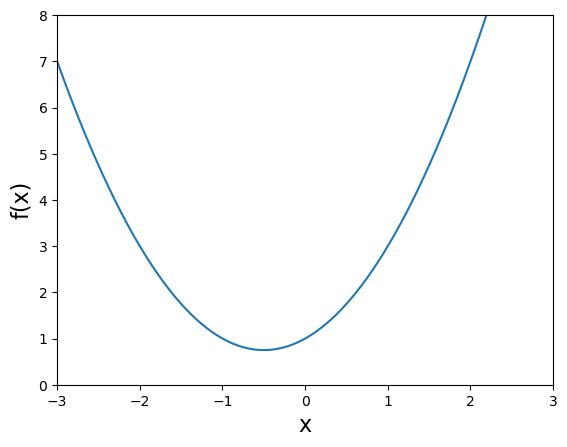

In [49]:
plt.xlim([-3,3])
plt.ylim(0, 8)
plt.xlabel('x', fontsize=16)
plt.ylabel('f(x)', fontsize=16)
plt.plot(x_1, f(x_1))
plt.show()

## Slope & Derivatives

Challenge: Create a p[ython function pfor the derivative of the f(x) called df(x)

In [50]:
def df(x):
    return 2*x + 1

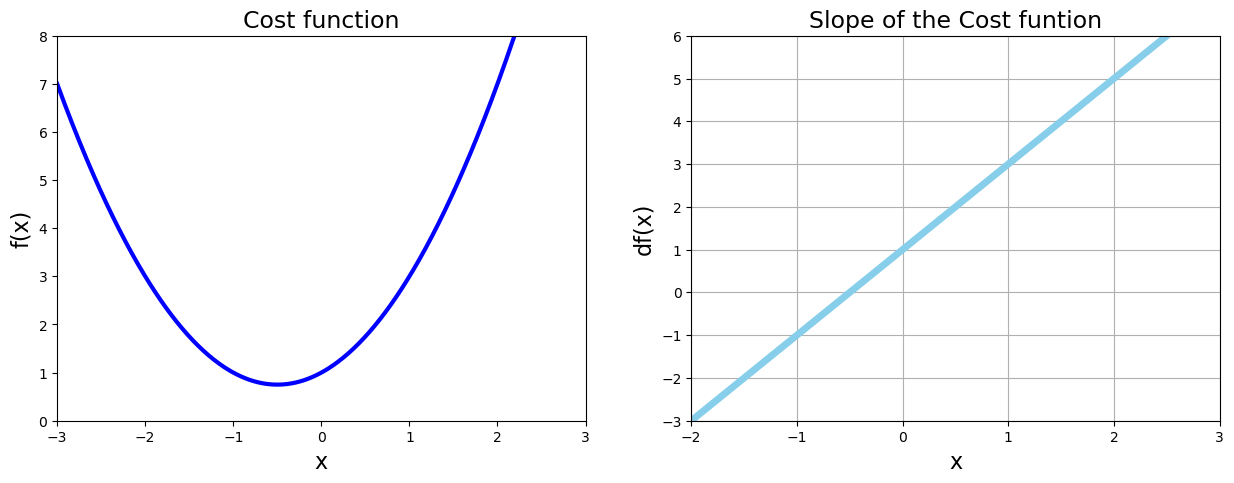

In [51]:
# PLot functinon and derivative side by side

plt.figure(figsize=[15, 5])
# 1 chart: cost function
plt.subplot(1, 2, 1)

plt.xlim([-3,3])
plt.ylim(0, 8)

plt.title('Cost function', fontsize=17)
plt.xlabel('x', fontsize=16)
plt.ylabel('f(x)', fontsize=16)

plt.plot(x_1, f(x_1), color='blue', linewidth=3)

# 2 chart: Derivative
plt.subplot(1, 2, 2)
plt.title('Slope of the Cost funtion', fontsize=17)
plt.xlabel('x', fontsize=16)
plt.ylabel('df(x)', fontsize=16)
plt.grid()
plt.xlim([-2,3])
plt.ylim(-3, 6)

plt.plot(x_1, df(x_1), color='skyblue', linewidth=5)

plt.show()

In [52]:
## Python Loops & Gradient Descent

In [53]:
# Python For Loop
for i in range(5):
    print('Hello world', i)
print('End of loop')

Hello world 0
Hello world 1
Hello world 2
Hello world 3
Hello world 4
End of loop


In [54]:
# Python While Loop
counter = 0 
while counter < 7:
    print('counting counter...', counter)
    counter = counter + 1 
print('Ready or not, here I come!')

counting counter... 0
counting counter... 1
counting counter... 2
counting counter... 3
counting counter... 4
counting counter... 5
counting counter... 6
Ready or not, here I come!


In [55]:
# Gradient Descent
new_x = 3 
previous_x = 0 
step_multiplier = 0.1
precision = 0.00001

x_list = [new_x] 
slope_list = [df(new_x)]

for n in range(500):
    previous_x = new_x
    gradient = df(previous_x)
    new_x = previous_x - step_multiplier * gradient 

    step_size = abs(new_x - previous_x) 

    x_list.append(new_x) 
    slope_list.append(df(new_x))
    
    if step_size < precision:
        print('Loop ran this many times', n)
        break

print('Local minimum occurs at:', new_x)
print('Slope or df(x) value at this point is: ', df(new_x))
print('f(x) value at this point is: ', f(new_x))

Loop ran this many times 50
Local minimum occurs at: -0.49996003706460423
Slope or df(x) value at this point is:  7.992587079153068e-05
f(x) value at this point is:  0.7500000015970362


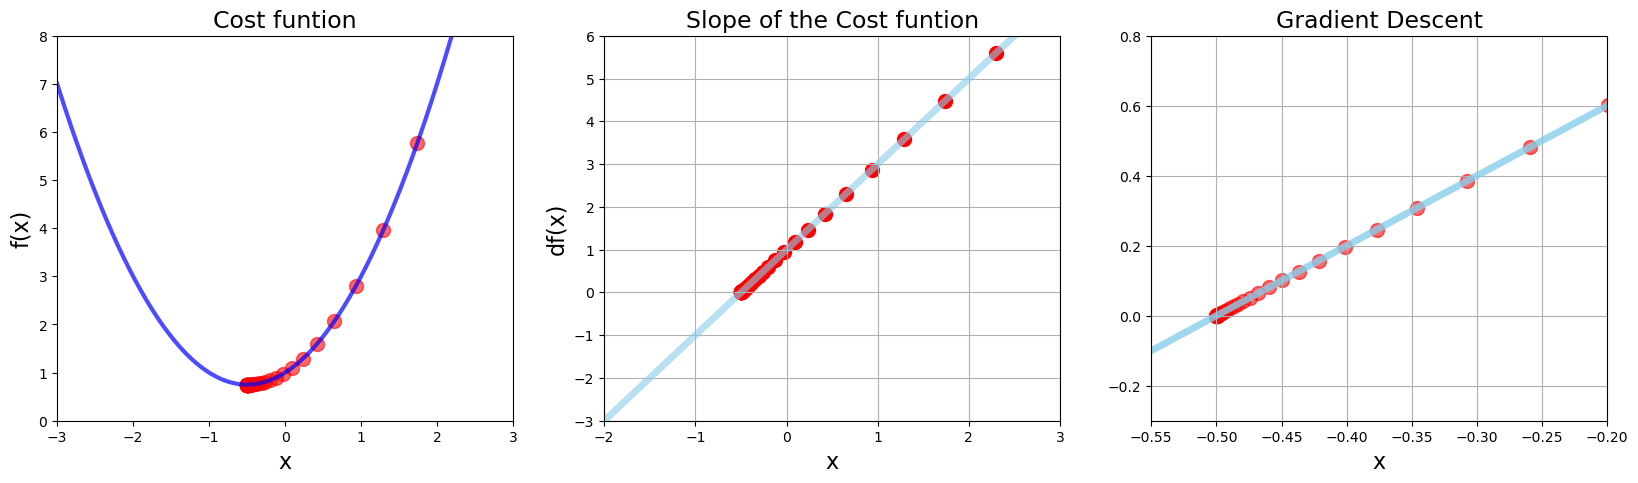

In [56]:
# Superimpose the GRadient descent calculations PLot functino and derivative side by side

plt.figure(figsize=[20, 5])
# 1 chart: cost function
plt.subplot(1, 3, 1)

plt.xlim([-3,3])
plt.ylim(0, 8)

plt.title('Cost funtion', fontsize=17)
plt.xlabel('x', fontsize=16)
plt.ylabel('f(x)', fontsize=16)

plt.plot(x_1, f(x_1), color='blue', linewidth=3, alpha=0.7)

values = np.array(x_list)
plt.scatter(x_list, f(values), color='red', s=100, alpha= 0.6)

# 2 chart: Derivative
plt.subplot(1, 3, 2)
plt.title('Slope of the Cost funtion', fontsize=17)
plt.xlabel('x', fontsize=16)
plt.ylabel('df(x)', fontsize=16)
plt.grid()
plt.xlim([-2,3])
plt.ylim(-3, 6)

plt.plot(x_1, df(x_1), color='skyblue', linewidth=5, alpha = 0.6)
plt.scatter(x_list, slope_list, color='red', s=100)

# 3 chart: Derivative (close up)
plt.subplot(1, 3, 3)
plt.title('Gradient Descent', fontsize=17)
plt.xlabel('x', fontsize=16)
plt.grid()
plt.xlim([-0.55,-0.2])
plt.ylim(-0.3, 0.8)

plt.plot(x_1, df(x_1), color='skyblue', linewidth=5, alpha = 0.8)
plt.scatter(x_list, slope_list, color='red', s=100, alpha=.6)






plt.show()

# Example 2 - Multiplie Minima vs Initial Guess & Advanced Functions

## $$g(x) = x^4 - 4x^2 + 5$$

In [57]:
# Make some data.
x_2 = np.linspace(-2, 2, 1000)

# Challenge: Write the g(x) funtion and the dg(x) funtion in python?

def g(x):
    return x**4 - 4 * x**2 + 5

def dg(x):
    return 4*x**3 - 8*x

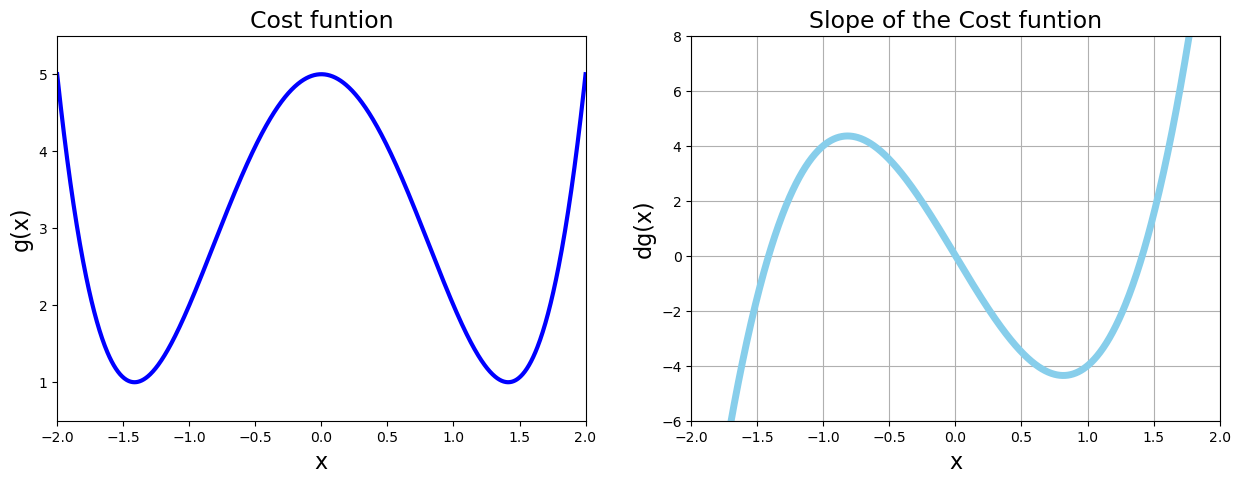

In [58]:
# PLot function and derivative side by side

plt.figure(figsize=[15, 5])
# 1 chart: cost function
plt.subplot(1, 2, 1)

plt.xlim([-2,2])
plt.ylim(0.5, 5.5)

plt.title('Cost funtion', fontsize=17)
plt.xlabel('x', fontsize=16)
plt.ylabel('g(x)', fontsize=16)

plt.plot(x_2, g(x_2), color='blue', linewidth=3)

# 2 chart: Derivative
plt.subplot(1, 2, 2)
plt.title('Slope of the Cost funtion', fontsize=17)
plt.xlabel('x', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)
plt.grid()
plt.xlim([-2,2])
plt.ylim(-6, 8)

plt.plot(x_2, dg(x_2), color='skyblue', linewidth=5)

plt.show()

## Gradient Descent as a Python Function

In [59]:
def gradient_descent(derivative_func, initial_guess, multiplier=0.02, precision=0.001, max_iter=300):
    new_x = initial_guess
    x_list = [new_x] 
    slope_list = [derivative_func(new_x)]
    
    for n in range(max_iter):
        previous_x = new_x
        gradient = derivative_func(previous_x)
        new_x = previous_x - multiplier * gradient 
    
        step_size = abs(new_x - previous_x)
        x_list.append(new_x) 
        slope_list.append(derivative_func(new_x))
        
        # Debugging output to trace execution
        # print(f"Step {n+1}: x = {new_x}, step size = {step_size}")

        if step_size < precision:
            break

    return new_x, x_list, slope_list

In [60]:
local_min, x_list, deriv_list = gradient_descent(dg, 0.5, 0.02, 0.001)
print('Local min occurs at:', local_min)
print('Number of steps:', len(x_list))

Local min occurs at: 1.4122375085019094
Number of steps: 23


In [61]:
local_min, x_list, deriv_list = gradient_descent(derivative_func=dg, initial_guess=-0.5, multiplier=0.02, precision =0.001)
print('Local min occurs at:', local_min)
print('Number of steps:', len(x_list))

Local min occurs at: -1.4122375085019094
Number of steps: 23


In [62]:
local_min, x_list, deriv_list = gradient_descent(derivative_func=dg, initial_guess=-0.1)
print('Local min occurs at:', local_min)
print('Number of steps:', len(x_list))

Local min occurs at: -1.4120887490901561
Number of steps: 34


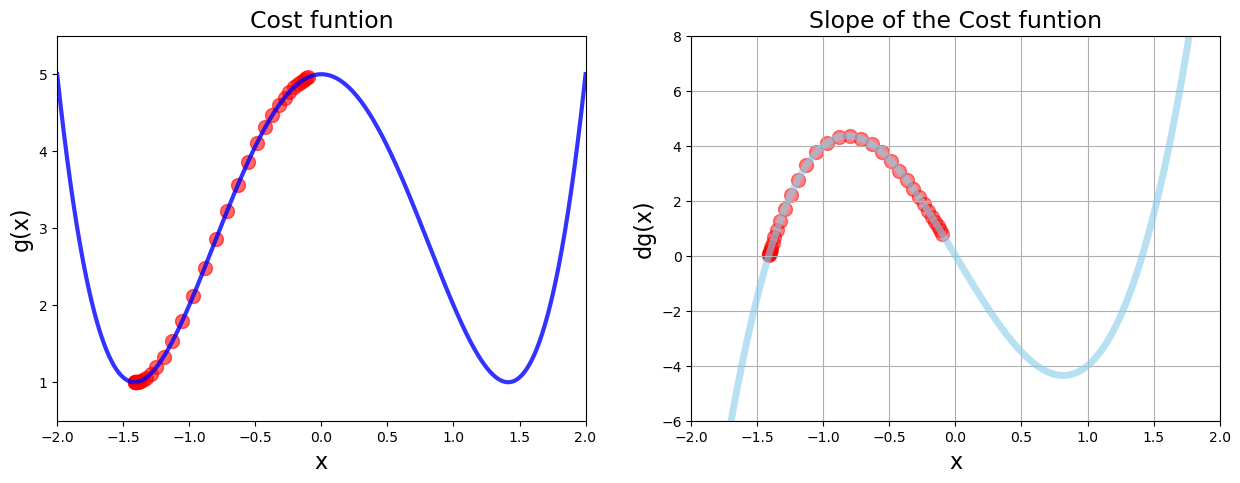

In [63]:
# Calling gradient descent function
local_min, x_list, deriv_list = gradient_descent(derivative_func=dg,initial_guess =  -0.1)
# Plot functinon derivative and scatter plot side by side

plt.figure(figsize=[15, 5])
# 1 chart: cost function
plt.subplot(1, 2, 1)

plt.xlim([-2,2])
plt.ylim(0.5, 5.5)

plt.title('Cost funtion', fontsize=17)
plt.xlabel('x', fontsize=16)
plt.ylabel('g(x)', fontsize=16)

plt.plot(x_2, g(x_2), color='blue', linewidth=3, alpha=0.8)
plt.scatter(x_list, g(np.array(x_list)), color='red', s=100, alpha=0.6)

# 2 chart: Derivative
plt.subplot(1, 2, 2)
plt.title('Slope of the Cost funtion', fontsize=17)
plt.xlabel('x', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)
plt.grid()
plt.xlim([-2,2])
plt.ylim(-6, 8)

plt.plot(x_2, dg(x_2), color='skyblue', linewidth=5, alpha=0.6)
plt.scatter(x_list, deriv_list, color='red', s=100, alpha=0.5)

plt.show()

# Example 3 - Divergence, Overflow, and Python Tuples
## $$h(x) =  x^5 - 2x^4 + 2$$

In [64]:
# Make data 
x_3 = np.linspace(start =-2.5, stop=2.5, num=1000)

def h(x):
    return x**5 - 2*x**4 + 2

def dh(x):
    return 5*x**4 - 8*x**3

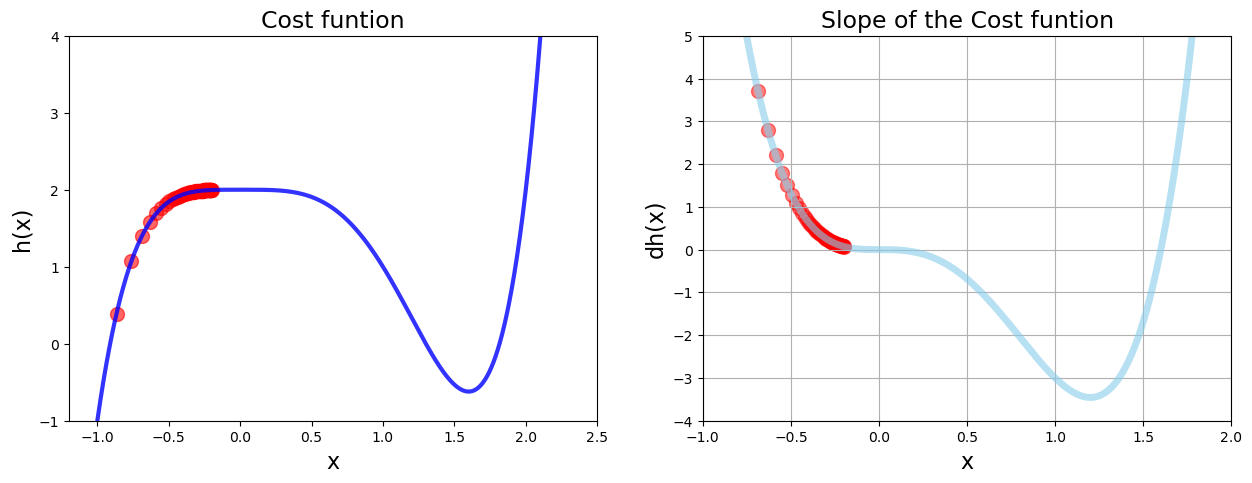

Local min occurs at:  -2071072.4470816324
Cost at this minimum is:  -3.810455326061589e+31
Number of steps:  71


In [65]:
# Calling gradient descent function
local_min, x_list, deriv_list = gradient_descent(derivative_func=dh, initial_guess= -0.2, max_iter=70)
# Plot functinon derivative and scatter plot side by side

plt.figure(figsize=[15, 5])
# 1 chart: cost function
plt.subplot(1, 2, 1)

plt.xlim(-1.2, 2.5)
plt.ylim(-1, 4)

plt.title('Cost funtion', fontsize=17)
plt.xlabel('x', fontsize=16)
plt.ylabel('h(x)', fontsize=16)

plt.plot(x_3, h(x_3), color='blue', linewidth=3, alpha=0.8)
plt.scatter(x_list, h(np.array(x_list)), color='red', s=100, alpha=0.6)

# 2 chart: Derivative
plt.subplot(1, 2, 2)
plt.title('Slope of the Cost funtion', fontsize=17)
plt.xlabel('x', fontsize=16)
plt.ylabel('dh(x)', fontsize=16)
plt.grid()
plt.xlim([-1,2])
plt.ylim(-4, 5)

plt.plot(x_3, dh(x_3), color='skyblue', linewidth=5, alpha=0.6)
plt.scatter(x_list, deriv_list, color='red', s=100, alpha=0.5)

plt.show()
print('Local min occurs at: ', local_min)
print('Cost at this minimum is: ', h(local_min))
print('Number of steps: ', len(x_list))




In [66]:
# 380,000,000,000,000,000,000,000,000,000

In [67]:
import sys
# help(sys)
# sys.version
# type(h(local_min))
sys.float_info.max

1.7976931348623157e+308

# Python Tuple

In [68]:
# Creating a Tuple
breakfast = 'bacon', 'eggs', 'avocado'
unlucky_numbers = 13, 4, 9, 26, 17
print('I love', breakfast[0])
print('My hotel has no ' + str(unlucky_numbers[1]) + 'th floor')
not_my_addres = 1, 'Infinite Loop', 'Cupertino', 95014
# breakfast[0] = 'sausege' Tuples are immutable and can not change them after they have been created

tuple_with_single_value = 42, 
print(tuple_with_single_value)
type(tuple_with_single_value)


main, side, greens = breakfast
print('main course is', main)
data_tuple = gradient_descent(derivative_func=dh, initial_guess=.2)
print('Local min is', data_tuple[0])
print('Cost at the last x value is', h(data_tuple[0]))
print('Number of steps is', len(data_tuple[1]))

I love bacon
My hotel has no 4th floor
(42,)
main course is bacon
Local min is 1.5989534547394717
Cost at the last x value is -0.6214287992331258
Number of steps is 117


# The Learning Rate

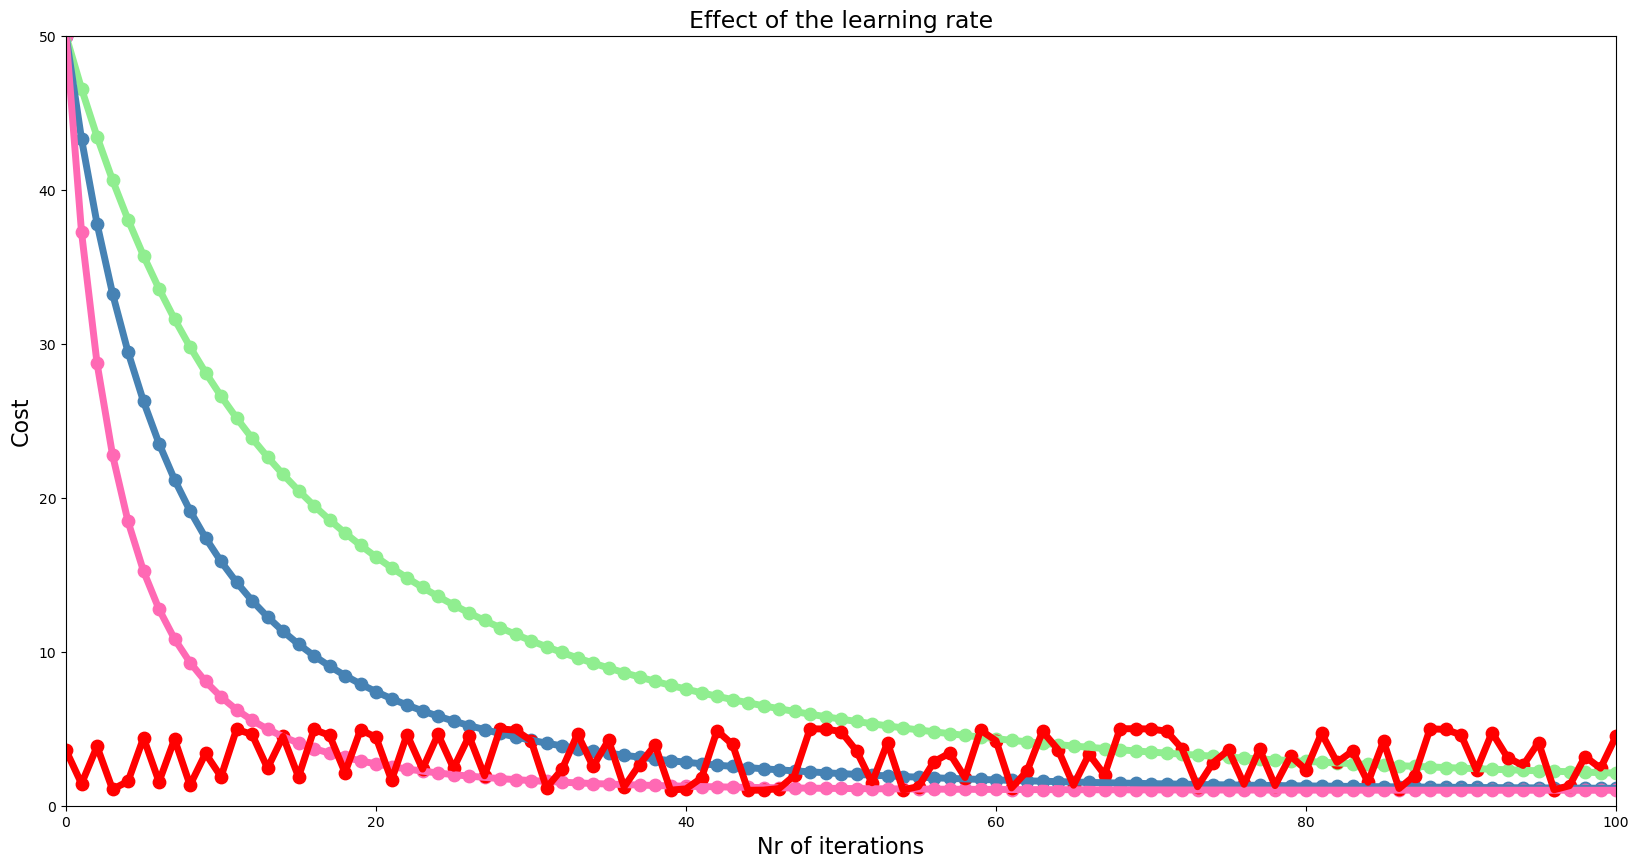

In [69]:
# Calling gradient descent function
n = 100
low_gamma= gradient_descent(derivative_func=dg,initial_guess =  3, multiplier=0.0005, precision= 0.0001, max_iter=n)


# Challenge: Plot two more learning rates: mid_gamma (0.001) and high_gamma (0.002) 

mid_gamma= gradient_descent(derivative_func=dg,initial_guess =  3, multiplier=0.001, precision= 0.0001, max_iter=n)

high_gamma= gradient_descent(derivative_func=dg,initial_guess =  3, multiplier=0.002, precision= 0.0001, max_iter=n)


# Experiment 
insane_gamma = gradient_descent(derivative_func=dg, initial_guess=1.9, multiplier=0.25, precision=0.0001, max_iter=n)


# Plotting reduction in cost for each iteration
plt.figure(figsize=[20, 10])

plt.xlim([0,n])
plt.ylim(0, 50)

plt.title('Effect of the learning rate', fontsize=17)
plt.xlabel('Nr of iterations', fontsize=16)
plt.ylabel('Cost', fontsize=16)

# Values for our charts
# 1) Y Axis Data: convert the lists to numpy arrays 
low_values = np.array(low_gamma[1])

# 2) X Axis Data: create a list from 0 to n+1
iteration_list = list(range(0, n+1))

# Plotting low learning rate
plt.plot(iteration_list, g(low_values), color='lightgreen', linewidth=5)
plt.scatter(iteration_list, g(low_values), color = 'lightgreen', s=80)

# Plotting mid learning rate
plt.plot(iteration_list, g(np.array(mid_gamma[1])), color='steelblue', linewidth=5)
plt.scatter(iteration_list, g(np.array(mid_gamma[1])), color = 'steelblue', s=80)

# Plotting high learning rate
plt.plot(iteration_list, g(np.array(high_gamma[1])), color='hotpink', linewidth=5)
plt.scatter(iteration_list, g(np.array(high_gamma[1])), color = 'hotpink', s=80)

# Plotting insane learning rate
# Create a separate iteration list for insane_gamma
insane_iteration_list = list(range(0, len(insane_gamma[1])))
plt.plot(insane_iteration_list  , g(np.array(insane_gamma[1])), color='red', linewidth=5)
plt.scatter(insane_iteration_list, g(np.array(insane_gamma[1])), color = 'red', s=80)


plt.show()

# Example 4 Data Visualization with 3D Charts

## Minimize $$f(x, y) = \frac{1}{3^{-x^2 - Y^2} + 1} $$

Minimize $$f(x, y) = \frac{1}{r + 1}$$ where $r$ is $3^{-x^2 - y^2}$ 

In [70]:
def f(x,y):
    r = 3**(-x**2 - y**2)
    return 1 / (r + 1) 

In [71]:
# Make out x and y data 

x_4 = np.linspace(start=-2, stop= 2, num=200) 
y_4 = np.linspace(start=-2, stop=2, num=200)

print('Shape of x array', x_4.shape)

x_4, y_4 = np.meshgrid(x_4, y_4)
print('Array after meshgrid: ', x_4.shape)
x_4

Shape of x array (200,)
Array after meshgrid:  (200, 200)


array([[-2.        , -1.9798995 , -1.95979899, ...,  1.95979899,
         1.9798995 ,  2.        ],
       [-2.        , -1.9798995 , -1.95979899, ...,  1.95979899,
         1.9798995 ,  2.        ],
       [-2.        , -1.9798995 , -1.95979899, ...,  1.95979899,
         1.9798995 ,  2.        ],
       ...,
       [-2.        , -1.9798995 , -1.95979899, ...,  1.95979899,
         1.9798995 ,  2.        ],
       [-2.        , -1.9798995 , -1.95979899, ...,  1.95979899,
         1.9798995 ,  2.        ],
       [-2.        , -1.9798995 , -1.95979899, ...,  1.95979899,
         1.9798995 ,  2.        ]])

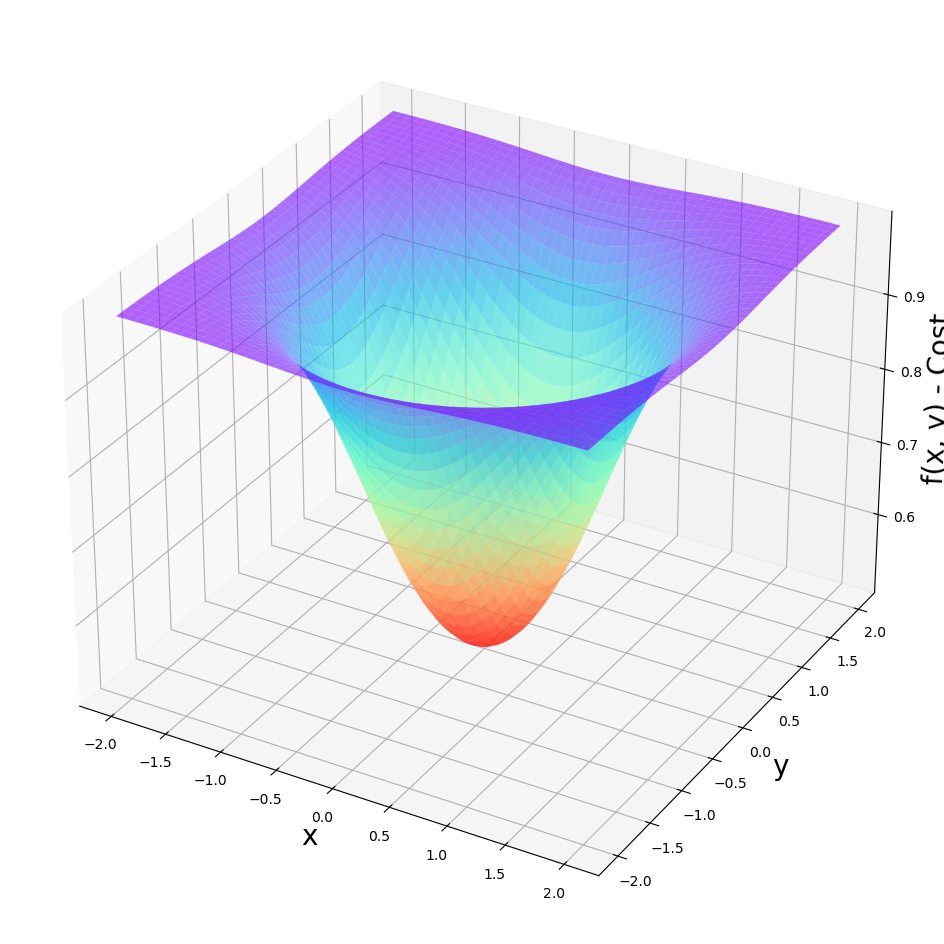

In [72]:
# Generating 3D PLot
fig = plt.figure(figsize=[16, 12])
ax = fig.add_subplot(projection='3d')

ax.set_xlabel('x', fontsize=20)
ax.set_ylabel('y', fontsize=20)
ax.set_zlabel('f(x, y) - Cost', fontsize=20)

ax.plot_surface(x_4, y_4, f(x_4, y_4), cmap=cm.rainbow_r, alpha=0.6)

plt.show()

# Partial Derivatives & Symbolic Computation

## $$\frac{\partial f}{\partial x} = \frac {2x \ln(3) \cdot 3^2 {-x^2 - y^2} }{\left(3^{-x^2-y^2} + 1\right)^2}$$
## $$\frac{\partial f}{\partial y} = \frac {2y \ln(3) \cdot 3^2 {-x^2 - y^2} }{\left(3^{-x^2-y^2} + 1\right)^2}$$

In [73]:
a, b = symbols('x, y')
print('Our cost function f(x, y) is: ', f(a, b))
print('Partial derivative wrt x is: ', diff(f(a,b), a)) 
print('Value of f(x, y) at x=1.8 y=1.0 is: ', f(a, b).evalf(subs={a:1.8, b:1.0}))
print('Value of partial derivative with respect to x', diff(f(a,b), a).evalf(subs={a:1.8, b:1.0}))


Our cost function f(x, y) is:  1/(3**(-x**2 - y**2) + 1)
Partial derivative wrt x is:  2*3**(-x**2 - y**2)*x*log(3)/(3**(-x**2 - y**2) + 1)**2
Value of f(x, y) at x=1.8 y=1.0 is:  0.990604794032582
Value of partial derivative with respect to x 0.0368089716197505


# Batch Gradient Descent with SymPy

In [74]:
# Setup

multiplier = 0.1
max_iter = 500
params = np.array([1.8, 1.0]) # initial guess

for n in range(max_iter):
    gradient_x = diff(f(a,b), a).evalf(subs={a:params[0], b:params[1]})
    gradient_y = diff(f(a,b), b).evalf(subs={a:params[0], b:params[1]})
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients

# Results 
print('Values in gradient array', gradients) 
print('Minimum occurs at x value of: ', params[0])
print('Minimum occurs at y value of: ', params[1])
print('The cost is: ', f(params[0], params[1]))

Values in gradient array [2.01013037525579e-11 1.11673909736433e-11]
Minimum occurs at x value of:  3.45838599885832e-11
Minimum occurs at y value of:  1.92132555492129e-11
The cost is:  0.500000000000000


In [75]:
# Partial Derivative Functions example 4 
def fpx(x, y):
    r = 3**(-x**2 - y**2)
    return 2*x*log(3)*r / (r + 1) **2

def fpy(x, y):
    r = 3**(-x**2 - y**2)
    return 2*y*log(3)*r / (r + 1) **2

In [90]:
# Setup

multiplier = 0.1
max_iter = 200
params = np.array([1.8, 1.0]) # initial guess

for n in range(max_iter):
    gradient_x = fpx(params[0], params[1])
    gradient_y = fpy(params[0], params[1])
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients

# Results 
print('Values in gradient array', gradients) 
print('Minimum occurs at x value of: ', params[0])
print('Minimum occurs at y value of: ', params[1])
print('The cost is: ', f(params[0], params[1]))

Values in gradient array [0.00046144 0.00025636]
Minimum occurs at x value of:  0.0007938985101347202
Minimum occurs at y value of:  0.0004410547278526219
The cost is:  0.5000002265349848


## Graphing 3D Gradient Descent & Advanced Numpy Arrays

In [91]:
# Setup

multiplier = 0.1
max_iter = 800
params = np.array([1.8, 1.0]) # initial guess
values_array = params.reshape(1, 2)
print(values_array.shape)

for n in range(max_iter):
    gradient_x = fpx(params[0], params[1])
    gradient_y = fpy(params[0], params[1])
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients
    # values_array = np.append(values_array, params.reshape(1,2), axis=0)
    values_array = np.concatenate((values_array, params.reshape(1, 2)), axis=0)

    

# Results 
print('Values in gradient array', gradients) 
print('Minimum occurs at x value of: ', params[0])
print('Minimum occurs at y value of: ', params[1])
print('The cost is: ', f(params[0], params[1]))

(1, 2)
Values in gradient array [8.75654338e-19 4.86474632e-19]
Minimum occurs at x value of:  1.5065444215368068e-18
Minimum occurs at y value of:  8.369691230760037e-19
The cost is:  0.5


In [92]:
# Advanced Numpy Array Practice:

kirk = np.array([['Captain', 'guitar']])
print(kirk.shape)

hs_band = np.array([['Black thought', 'MC'],['Questlove', 'Drums']])
print(hs_band.shape)

print('hs_band[0] :', hs_band[0])
print('hs_band[0][1] :', hs_band[1][0])
      
the_roots = np.append(arr=hs_band, values=kirk, axis=0)
print(the_roots)

print('Printing nicknames....', the_roots[:, 0])

the_roots = np.append(arr = the_roots, values=[['Malik B', 'MC']], axis=0)
print('Printing band roles....', the_roots[:, 1])

(1, 2)
(2, 2)
hs_band[0] : ['Black thought' 'MC']
hs_band[0][1] : Questlove
[['Black thought' 'MC']
 ['Questlove' 'Drums']
 ['Captain' 'guitar']]
Printing nicknames.... ['Black thought' 'Questlove' 'Captain']
Printing band roles.... ['MC' 'Drums' 'guitar' 'MC']


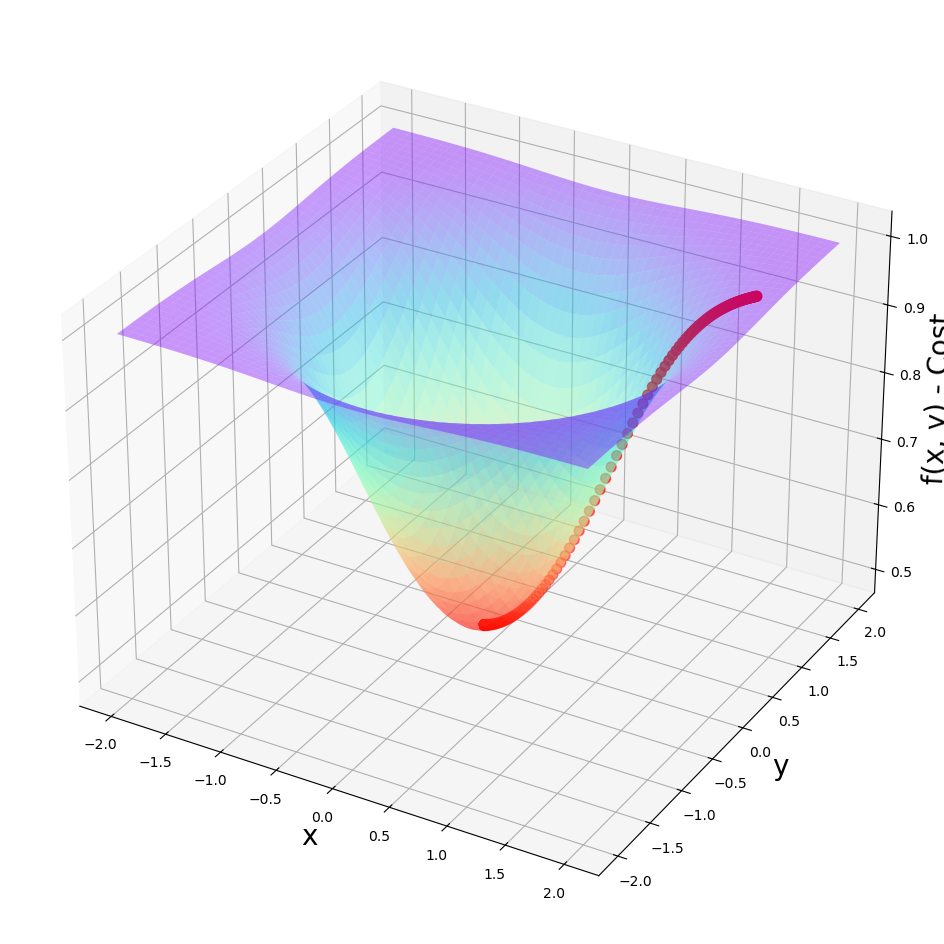

In [94]:
# Generating 3D PLot
fig = plt.figure(figsize=[16, 12])
ax = fig.add_subplot(projection='3d')

ax.set_xlabel('x', fontsize=20)
ax.set_ylabel('y', fontsize=20)
ax.set_zlabel('f(x, y) - Cost', fontsize=20)

ax.plot_surface(x_4, y_4, f(x_4, y_4), cmap=cm.rainbow_r, alpha=0.4)
ax.scatter(values_array[:, 0], values_array[:, 1], f(values_array[:, 0], values_array[:, 1]), s=50, color= 'red')

plt.show()

# Example 5 Working with Data & Real Cost Function

## Mean Squared Error: a cost functinon for regression problems

### $$RSS = \sum_{i=1}^{n} \big(y^2{(i)} - h_\theta x^{(i)} \big) ^2$$
### $$RSE = \frac{1}{n}\sum_{i=1}^{n} \big(y^2{(i)} - h_\theta x^{(i)} \big) ^2$$
### $$RSE = \frac{1}{n}\sum_{i=1}^{n} \big(y^2{(i)} - \hat{y} \big) ^2$$

In [99]:
## Make Sample Data 
x_5 = np.array([[0.1, 1.2, 2.4, 3.2, 4.1, 5.7, 6.5]]).transpose()
y_5 = np.array([1.7, 2.4, 3.5, 3.0, 6.1, 9.4, 8.2]).reshape(7,1)

print('Shape opf the x_5 array: ', x_5.shape)
print('Shape opf the y_5 array: ', y_5.shape)

Shape opf the x_5 array:  (7, 1)
Shape opf the y_5 array:  (7, 1)


In [101]:
#Quick Linear Regression
regr = LinearRegression()
regr.fit(x_5, y_5)
print('Theta 0: ', regr.intercept_[0])
print('Theta 1: ', regr.coef_[0][0])

Theta 0:  0.8475351486029545
Theta 1:  1.2227264637835913


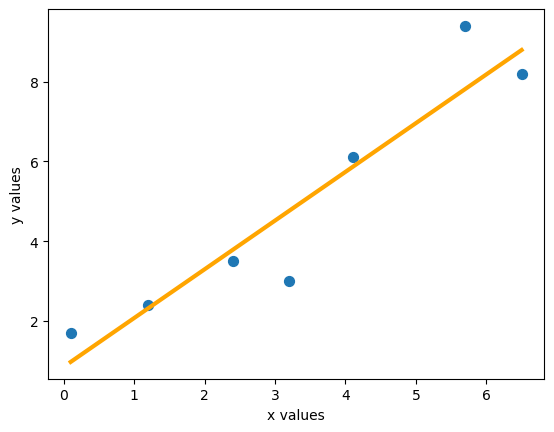

In [104]:
plt.scatter(x_5, y_5, s=50)
plt.plot(x_5, regr.predict(x_5), color='orange', linewidth=3)
plt.xlabel('x values')
plt.ylabel('y values')
plt.show()

In [110]:
# y_hat = theta0 + theta1 * x 
y_hat = 0.8475351486029545 + 1.2227264637835913 * x_5
print('Estimated values y_hat are: \n', y_hat)
print('In comparision the actual y values are \n', y_5)

Estimated values y_hat are: 
 [[0.96980779]
 [2.31480691]
 [3.78207866]
 [4.76025983]
 [5.86071365]
 [7.81707599]
 [8.79525716]]
In comparision the actual y values are 
 [[1.7]
 [2.4]
 [3.5]
 [3. ]
 [6.1]
 [9.4]
 [8.2]]


In [114]:
# Write a python function mse (y, y_hat) returns the MSE? call the mse(y, y_hat)
# function and print oput the MSE for the y_hat calculated  above 

def mse(y, y_hat):
        # mse_calc= 1/7 * sum(y-y_hat)**2
    # mse_calc= 1/y.size() * sum(y-y_hat)**2
    mse_calc = np.average((y - y_hat )**2, axis=0) 
    return mse_calc

In [119]:
print('Manually claculated MSE is: ', mse(y_5, y_hat))
print("MSE Regression using manual calc is ", mean_squared_error(y_5, y_hat))
print("MSE Regression is ", mean_squared_error(y_5, regr.predict(x_5)))

Manually claculated MSE is:  [0.94796558]
MSE Regression using manual calc is  0.9479655759794577
MSE Regression is  0.9479655759794577
